# Build Broadband pipeline

In [1]:
import xarray as xr
import kaooi
import os

%load_ext autoreload
%autoreload 2

In [8]:
# function inputs
ds_dir = '/datadrive/kauai/transmissions/64k_sensors'
Tx_time = kaooi.get_Tx_keytimes(2023)
length = '60s'
verbose=True

In [9]:
len(Tx_time)

203

In [7]:
kaooi.downloadTx_64kHz(Tx_time, ds_dir, length, verbose)

LJ01D:
Fetching URLs...
Client response:  https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2023/03/18/
No data available for specified day and node. Please change the day or use a different node
PC01A:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]


Merging Data...
PC03A:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]


Merging Data...
LJ01C:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.13it/s]


Merging Data...
LJ03A:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.03it/s]


Merging Data...


/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


20230318T040000 completed.


/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


In [3]:
# check if data already exists
fnr = f'{ds_dir}/real/{Tx_time.strftime("%Y%m%dT%H%M%S")}.nc'
fni = f'{ds_dir}/imag/{Tx_time.strftime("%Y%m%dT%H%M%S")}.nc'

if os.path.exists(fnr) & os.path.exists(fni):
    if verbose: print(f'{Tx_time.strftime("%Y%m%dT%H%M%S")} skipped')
    print('path exists')

In [4]:
#download data from ooi server
data = kaooi.download_data_bb(Tx_time, length=length, verbose=verbose)

LJ01D:
Fetching URLs...
Client response:  https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2023/03/18/
No data available for specified day and node. Please change the day or use a different node
PC01A:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


Merging Data...
PC03A:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


Merging Data...
LJ01C:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


Merging Data...
LJ03A:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]


Merging Data...


In [5]:
# decimate data
data_dec = kaooi.decimate_data(data)

In [8]:
# convert to x array.dataset
data_x = kaooi.construct_xds(Tx_time, data_dec, length=length, sampling_rate=500, chunk_sizes={'time':30001})

In [16]:
# remove mean from data
data_x_nm = data_x - data_x.mean()

In [ ]:
# skip if there is uneven data coverage
if data_x is None:
    if verbose: print(f'{Tx_time.strftime("%Y%m%dT%H%M%S")} skipped')
    return

In [17]:
# match filter the data
data_x_match = kaooi.match_filter(data_x_nm, dim='time', sampling_rate=500, length=length)

/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


In [20]:
# save to disk
# duct taping that netcdf doesn't allow complex numbers    
data_x_match.real.to_netcdf(fnr)
data_x_match.imag.to_netcdf(fni)

/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


In [25]:
xr.open_dataset(fnr).set_index({'time':['longtime','shorttime']}).unstack()['LJ03A']

<xarray.DataArray 'LJ03A' (transmission: 1, longtime: 2, shorttime: 13640)>
array([[[  68130.75592178,   68317.51220396,  -14414.88989914, ...,
           44775.4594756 ,   99567.28429029,   13119.90192717],
        [-114537.0345862 , -178490.55688589, -138937.66989912, ...,
          -82157.78697034,  -58427.56536817,  -13449.52449659]]])
Coordinates:
  * longtime      (longtime) float64 0.0 27.28
  * shorttime     (shorttime) float64 0.0 0.002 0.004 ... 27.27 27.28 27.28
  * transmission  (transmission) datetime64[ns] 2023-03-18

# Test gapless merge

In [1]:
import kaooi
import xarray as xr

In [2]:
Tx_times = kaooi.get_Tx_keytimes(year=2023)

In [18]:
Tx_times[119]

Timestamp('2023-06-10 00:00:00')

In [3]:
kaooi.downloadTx_64kHz(Tx_times[151], verbose=True)

LJ01D:
Fetching URLs...
Client response:  https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2023/08/07/
No data available for specified day and node. Please change the day or use a different node
PC01A:
Fetching URLs...
Sorting valid URLs for Time Window...


100%|███████████████████████████████████████████████████████████████████| 27/27 [00:31<00:00,  1.18s/it]


19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS01SBPS/PC01A/08-HYDBBA103/2023/08/07/./OO-HYVM2--YDH-2023-08-07T07:50:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS01SBPS/PC01A/08-HYDBBA103/2023/08/07/./OO-HYVM2--YDH-2023-08-07T07:55:00.000000Z.mseed
19199936
gapless merge for https://rawdata.oceanobservatories.org/files/RS01SBPS/PC01A/08-HYDBBA103/2023/08/07/./OO-HYVM2--YDH-2023-08-07T08:00:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS01SBPS/PC01A/08-HYDBBA103/2023/08/07/./OO-HYVM2--YDH-2023-08-07T08:05:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS01SBPS/PC01A/08-HYDBBA103/2023/08/07/./OO-HYVM2--YDH-2023-08-07T08:10:00.000000Z.mseed
19200064
gapless merge for https://rawdata.oceanobservatories.org/files/RS01SBPS/PC01A/08-HYDBBA103/2023/08/07/./OO-HYVM2--YDH-2023-08-07T08:15:00.000000Z.mseed
19200000
gapless merge for https:/

100%|███████████████████████████████████████████████████████████████████| 27/27 [00:32<00:00,  1.20s/it]


19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXPS/PC03A/08-HYDBBA303/2023/08/07/./OO-AXVM2--YDH-2023-08-07T07:50:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXPS/PC03A/08-HYDBBA303/2023/08/07/./OO-AXVM2--YDH-2023-08-07T07:55:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXPS/PC03A/08-HYDBBA303/2023/08/07/./OO-AXVM2--YDH-2023-08-07T08:00:00.000000Z.mseed
19199936
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXPS/PC03A/08-HYDBBA303/2023/08/07/./OO-AXVM2--YDH-2023-08-07T08:05:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXPS/PC03A/08-HYDBBA303/2023/08/07/./OO-AXVM2--YDH-2023-08-07T08:10:00.000000Z.mseed
19199936
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXPS/PC03A/08-HYDBBA303/2023/08/07/./OO-AXVM2--YDH-2023-08-07T08:15:00.000000Z.mseed
19200000
gapless merge for https:/

100%|███████████████████████████████████████████████████████████████████| 27/27 [00:29<00:00,  1.10s/it]


19200000
gapless merge for https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2023/08/07/./OO-HYEA1--YDH-2023-08-07T07:50:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2023/08/07/./OO-HYEA1--YDH-2023-08-07T07:55:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2023/08/07/./OO-HYEA1--YDH-2023-08-07T08:00:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2023/08/07/./OO-HYEA1--YDH-2023-08-07T08:05:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2023/08/07/./OO-HYEA1--YDH-2023-08-07T08:10:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2023/08/07/./OO-HYEA1--YDH-2023-08-07T08:15:00.000000Z.mseed
19200000
gapless merge for https:/

100%|███████████████████████████████████████████████████████████████████| 27/27 [00:32<00:00,  1.22s/it]


19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2023/08/07/./OO-AXVM1--YDH-2023-08-07T07:50:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2023/08/07/./OO-AXVM1--YDH-2023-08-07T07:55:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2023/08/07/./OO-AXVM1--YDH-2023-08-07T08:00:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2023/08/07/./OO-AXVM1--YDH-2023-08-07T08:05:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2023/08/07/./OO-AXVM1--YDH-2023-08-07T08:10:00.000000Z.mseed
19200000
gapless merge for https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2023/08/07/./OO-AXVM1--YDH-2023-08-07T08:15:00.000000Z.mseed
19200000
gapless merge for https:/

/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)
/home/jhrag/anaconda3/envs/ooi_dev/lib/python3.10/site-packages/scipy/signal/_signaltools.py:241: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


20230807T080000 completed.


## look at saved dataset

In [6]:
fn = '/datadrive/kauai/transmissions/64kHz_sensors/real/20230807T080000.nc'
ds = xr.open_dataset(fn)

In [7]:
ds

<xarray.Dataset>
Dimensions:       (transmission: 1, time: 3587320)
Coordinates:
  * transmission  (transmission) datetime64[ns] 2023-08-07T08:00:00
    longtime      (time) float64 ...
    shorttime     (time) float64 ...
Dimensions without coordinates: time
Data variables:
    LJ01D         (time, transmission) float64 ...
    PC01A         (time, transmission) float64 ...
    PC03A         (time, transmission) float64 ...
    LJ01C         (time, transmission) float64 ...
    LJ03A         (time, transmission) float64 ...

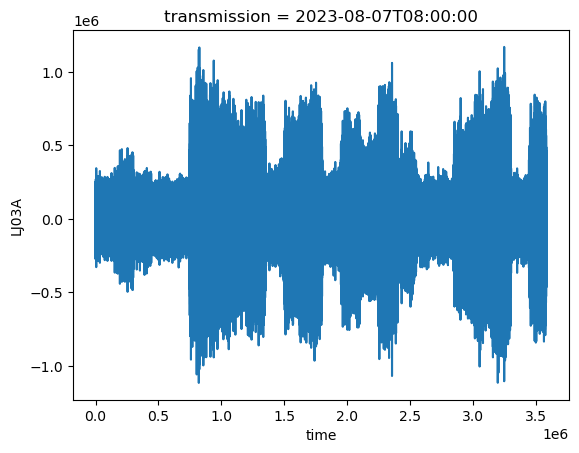

In [12]:
ds['LJ03A'].plot()

# Look at results

In [60]:
import xarray as xr
import kaooi
import os
import numpy as np
import hvplot.xarray
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
fnr = '/datadrive/kauai/transmissions/64k_sensors/real/20230318T000000.nc'
fni = '/datadrive/kauai/transmissions/64k_sensors/imag/20230318T000000.nc'

ds = xr.open_dataset(fnr) + 1j * xr.open_dataset(fni)
ds = ds.set_index({'time':['longtime', 'shorttime']}).unstack()

In [28]:
(20*np.log10(np.abs(ds['LJ01C'].rolling(longtime=20).mean()[0,:,:]))).sel({'longtime':3500}, method='nearest').hvplot()

:Curve   [shorttime]   (LJ01C)

In [45]:
ds

<xarray.Dataset>
Dimensions:       (longtime: 263, shorttime: 13640, transmission: 1)
Coordinates:
  * longtime      (longtime) float64 0.0 27.28 54.56 ... 7.12e+03 7.147e+03
  * shorttime     (shorttime) float64 0.0 0.002 0.004 ... 27.27 27.28 27.28
  * transmission  (transmission) datetime64[ns] 2023-03-18
Data variables:
    LJ01D         (transmission, longtime, shorttime) complex128 (nan+nanj) ....
    PC01A         (transmission, longtime, shorttime) complex128 (157026.6200...
    PC03A         (transmission, longtime, shorttime) complex128 (171385.8607...
    LJ01C         (transmission, longtime, shorttime) complex128 (58440.60667...
    LJ03A         (transmission, longtime, shorttime) complex128 (69207.25871...

In [46]:
single_channel = ds['PC01A'].rolling(longtime=20).mean()[0,:,:].sel({'longtime':3500}, method='nearest')
SNR = 20*np.log10(np.abs(single_channel) / np.sqrt(np.abs(single_channel)**2).mean())

In [83]:
node = 'LJ03A'

single_channel = ds[node].rolling(longtime=20).mean()[0,:,:]
rms = np.sqrt((np.abs(single_channel)**2).mean('shorttime'))
SNR = 20*np.log10(np.abs(single_channel) / rms)
SNR.hvplot.image(x='longtime', rasterize=True, cmap='rocket', clim=(-5,10), title=node)

:DynamicMap   []
   :Image   [longtime,shorttime]   (LJ03A)